<a href="https://colab.research.google.com/github/oyinloluwa20/Deep-Learning/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn #nn contains all of pytorch's building block from neural network
import matplotlib.pyplot as plt

#check pyTorch version
torch.__version__


'1.13.1+cu116'

##Data(preparing and loading)
* Excel speadsheet
* Images of any kind
* Vidoes (youtube has a lot of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

let's create some known data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

## Linear Regression
A linear regression line has an equation of the form Y =a+bX, where Xis the independent variable and Y is the dependent variable. The slope of the line is b and a is the intercept( the value of y when x = 0)

### Formula
   *Y =f(X,B) + e*
 * Y = dependent variable
 * f = function
 * X = independent variable
 * B = unknown parameter
 * e = error

In [ ]:
# Create a known parameters
weight =0.7
bias =0.3

#Create
start =0
end=1
step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(f'The len of x and y {len(y), len(X)}')
X[:10], y[:10]

The len of x and y (50, 50)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
 len(X) , len(y)

(50, 50)

### Splitting data into training and testing sets

In [ ]:
#Create a train/test split
train_split =int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
 
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

##Data visualization
Let's visualise our data using the mathplot library

In [ ]:
def plot_predictions(train_data =X_train,
                    train_labels =y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions =None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label ="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label ="Test data")

  #If there are predictions, then plot it
  if predictions is not None:
    plt.scatter(test_data, predictions, c ="r", s=4 , label =" Predictions")

  # Show the legend, i.e the show the label
  plt.legend(prop ={"size" :14});


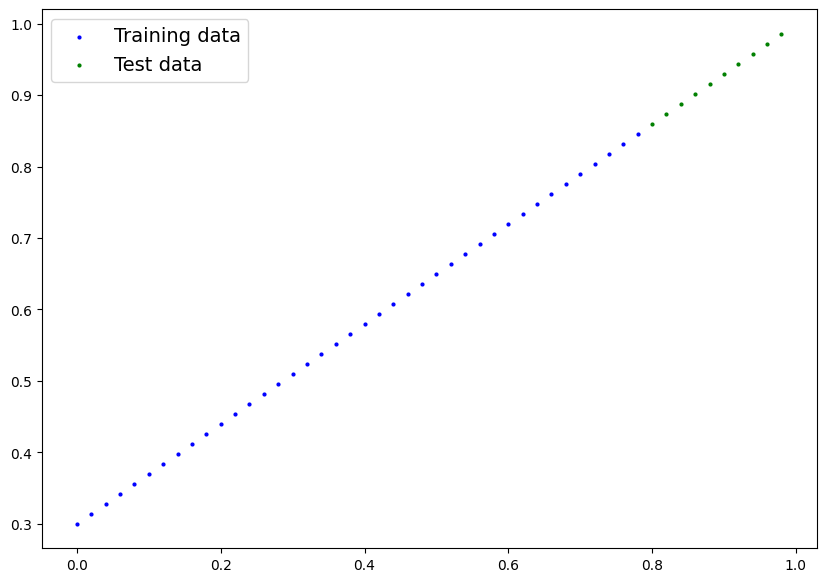

In [ ]:
plot_predictions()

##2. Build model
First PyTorch model.
you have to be familar with oop in python, https://realpython.com/pyhton3-object-oriented-programming/ is a great resource to learn.

The process our model follows:
* Start with random values (weight & bias)
* Looks at training data and adjust the random values to better represent ( or get closer to) the idea values ( the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

Learn this 2 concepts from 3blue1brown- youtube channel


In [ ]:
from torch import nn
#Create linear regression model class
class linearRegressionModel(nn.Module):
  def __init__(self):
      super().__init__()
      self.weights =nn.Parameter(torch.randn(1,
                                             requires_grad =True,
                                             dtype= torch.float)) # we create a weight parameter using nn.parameter
      self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad =True,
                                           dtype= torch.float)) # we create a bias also using nn.parameter
  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor: # <- "x" is the input data
      return self.weights * x +self.bias  #this is the linear regression formula

### Pytorch model building essentials

* torch.nn - contains all of the building blcks for computataion graphs( a neural network can be considered as a computational graph)
* torch.nn.parameters - the parameters required for the classes
* torch.nn.module - The base class for all neural network modules, if you subclass it, you should overwrite the forward() 
* torch.optim - this is where the optimizers in PyTorch live, they help with gradient descent
* def forward() -A ll nn.module sunclasses requires you to overwrite forward(), this defines what happens in the forward computation
* torch.utils.data.Dataset - Represents a map between key(label) and sample(features) pairs of your data. Such as images and their associated labels
* torch.utils.data.Dataloader - Creates a Python iterable over a torch Dataset(allows you to iterate over your data)

## Checking the contents of our PyTorch model
To check our model parameters we use .parameters().

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = linearRegressionModel()
#Check out the parameters with different methods
model_0.bias, model_0.weights,list(model_0.parameters()),model_0.state_dict()


(Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.3367], requires_grad=True),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.
When we pass data through our model, it.s going to run it through the `forward()` method.

In [ ]:
# Make predictions with the model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

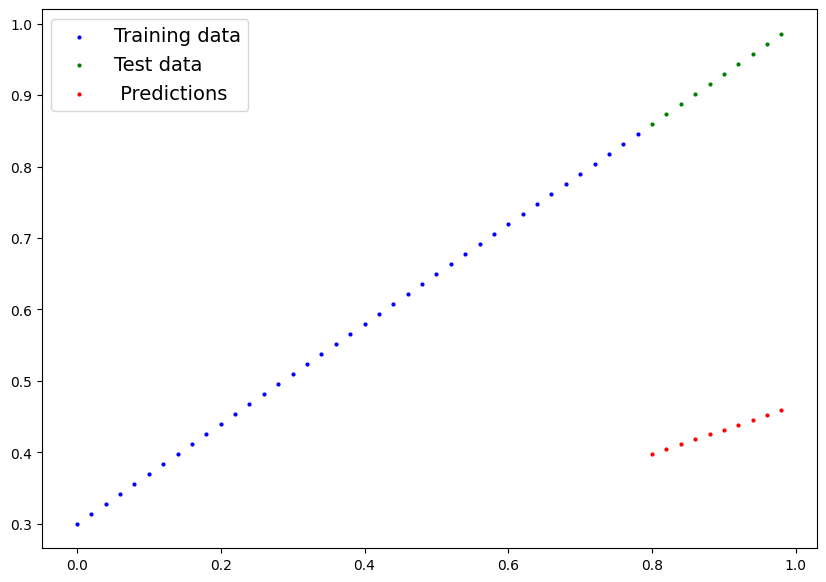

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to a known parameters

or in other wors from a poor representation of the data to a better representation

One way to measure how poor or how wrong your models predictions are, is to use a loss function.

* Note: Loss function may also be called cost function or critierion in different areas

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjust the model.s parameters (i.e weight& bias) to improve our loss
  * Inside the optimizer you will often have two parameters
    * `params` -the model parameter you'd like to optimise, for example `params = model_0.paramters`
    *`lr`(learning rate) - the rate is a hyperparameter that defines how big/small the optimizers change the parameters with each step( a small `lr` results in small chages, a large `lr` results in large chages)

And specifically for PyTorch we need:
* A training loop 
* A testing loop



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

For our model we use Mean absolute error(MAE)

MAE_loss = torch.mean(torch.abs(y_pred-y_test))
or MAE_loss = torch.nn.L1Loss


In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer(stochastic gradient descent)

optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.01)

The choice of loss function and optimizer is usually problem specific, you try out different one until you get an idea of what works and what doesnt

For our regressioin model we chose the `nn.L1Loss()` as the loss function and an optimizer `torch.optim.SGD()` was used

But for a classification problem e.g dog and cat classification, the loss model `nn.BCELoss)` (binary cross entropy loss)would perform better


### Building a training loop ( and a testing) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass ( this involves moving data through our model's `forward()`
functions) to make predictions on data - also called forward propagation
2. calaculate the loss( compare forward pass predictions to ground truth labels)
3. Optimizer zeero grad
4. Loss backward - moves backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss ( **backpropagation** )
5. Optimizer step -user the optimizer to adjust our models parameters to improve the loss(**gradient desesent**)

In [ ]:
torch.manual_seed(42)
# An epoch is one loop through data...(this is a hyperparameter because we set it ourself)
epochs =200
# Track different values
epoch_count =[]
loss_values =[]
test_loss_values =[]
###Training
# 0. Loop through 
for epoch in range(epochs):
  # set the model to trianing mode  
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to reqire gradients

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss= loss_fn(y_pred, y_train)
  #print(f"Loss:{loss}")

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes would accumulate throughr the loop, so wwe have to zero them above in step 3 for the next iteration of the loop

  model_0.eval()  # turns off gradient tracking turns off different setting in the model not needed for evaluation/testing(dropout/batch norm layers)
  with torch.inference_mode():  # turns off gradient tracking & a couple of things behind the scene
  # with torch.nograd(): you would see this in older PyTorch code, it does almost the same thing as the inference mode but the inference mode is slightly better
    #1. Do the forward pass
    test_pred = model_0(X_test)
    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")  
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test_loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test_loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test_loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test_loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test_loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test_loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test_loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
import numpy as np
# np.array(torch.tensor(loss_values).)

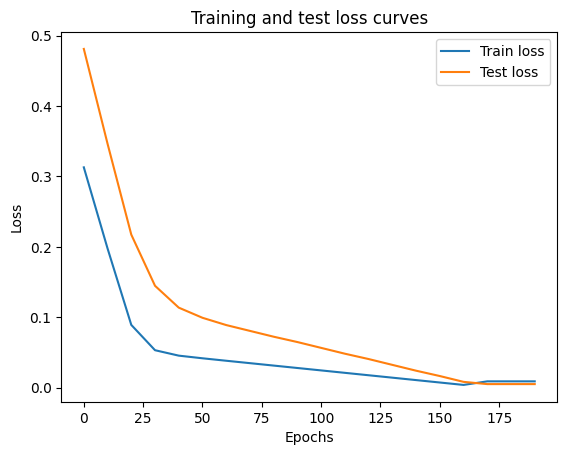

In [ ]:
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label ="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

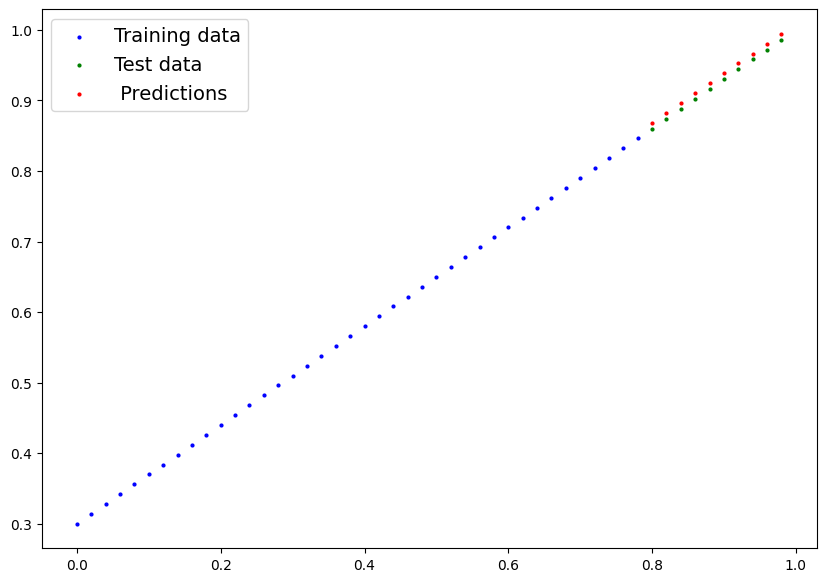

In [ ]:
plot_predictions(predictions=y_preds_new)

## Saving models in PyTorch
There are three main methods you should go about saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.module.ss.load_state_dict()` - allows you to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok =True)

#2. Create model save path
MODEL_NAME ="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Mar 29 18:40 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our models's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that 

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved_dict we have to instantiate a new instance of our model class
loaded_model_0 = linearRegressionModel()

#Load the saved state_dict of model_0 (this will update the neew instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# torch.manual_seed(42)
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

# plot_predictions(y_preds_new)

## 6. Putting it all together

Let's go back through the above steps and see it together in one place.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check our version
torch.__version__


'1.13.1+cu116'

Create device-agnostic code

This means if our device got access to gpu we would use( for potentially faster computing).

If GPU is not available, the code would default to CPU.

In [ ]:
device ="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cuda


In [ ]:
!nvidia-smi

Wed Mar 29 18:40:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |    573MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 6.1 Data

In [ ]:
 # Create some data using the linear regression formula: y = weight * X + bias

 weight = 0.7
 bias =0.3

 # Create some range of values
 start = 0
 stop =1
 step =0.02

 X = torch.arange(start = start, end = stop, step = step).unsqueeze(dim=1)
 y = weight * X + bias

 X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split the data
train_split =int(0.8*len(X))
train_split

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(y_test), len(y_train)

(10, 40)

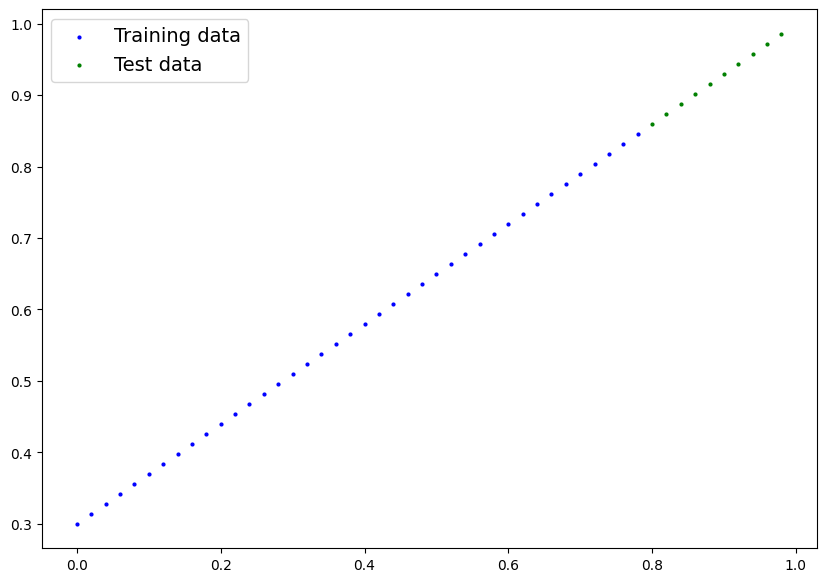

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

##6.2 Bulid a PyTorch Linear model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameter/ also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features =1,
                                    out_features =1)

  def forward(self, x:torch.Tensor)->torch.Tensor: 
    return self.linear_layer



In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

###6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop


In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer(stochastic gradient descent)

optimizer = torch.optim.SGD(params= model_1.parameters(), lr= 0.01)

In [ ]:
torch.manual_seed(42)
epochs = 200

#Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. Calculate the loss
  # loss = loss_fn(y_pred, y_train)

  # #3. Optimize zero grad
  # optimizer.zero_grad()

  # #4. Perform backpropagation
  # loss.backward()

  # #5. Optimizer step
  # optimizer.step()

AttributeError: ignored

### Tesing

In [ ]:
model_1.eval()
with torch.inference_mode():
  test_preds = model_1(X_test)

  test_loss = loss_fn(test_preds, y_test)
# Print out what's happening

if epoch % 10 ==0:
  print(f"Epoch: {epoch} | Loss: {loss} | Test_loss{test_loss}")
